# 05 - Double Regression Model

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the meta info and target variables
labels = pd.read_csv('../TRAIN/track_parms.csv')
labels = labels.rename(columns={'phi': 'theta'})
labels[['filename', 'theta', 'z']].tail()

,filename,theta,z
499995,img499995.png,-4.509653,0.968584
499996,img499996.png,-1.595661,-7.397094
499997,img499997.png,7.695264,-2.984060
499998,img499998.png,-1.898667,5.082713
499999,img499999.png,4.275843,-2.266920


## Create Data Generator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Conv2D, Activation, MaxPooling2D,
    Flatten, Dense, Dropout
)

height = 100
width = 36
channels = 3

datagen = ImageDataGenerator(rescale=1./255.,
                             validation_split=0.25)

# Double Regression

In [8]:
def double_regression_model():
    model = Sequential()

    # Convolution Layer
    model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     input_shape=(height, width, channels)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Dense, Regression Layer
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))

    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mse'])
    
    return model

In [10]:
n_subsample = 1000
batch_size = 32

train_gen = datagen.flow_from_dataframe(
    dataframe=labels.head(n_subsample),
    directory="../TRAIN",
    x_col="filename",
    y_col=["z", "theta"],
    subset="training",
    target_size=(height, width),
    batch_size=batch_size,
    seed=314,
    shuffle=False,
    class_mode="other",
)

val_gen = datagen.flow_from_dataframe(
    dataframe=labels.head(n_subsample),
    directory="../TRAIN",
    x_col="filename",
    y_col=["z", "theta"],
    subset="validation",
    target_size=(height, width),
    batch_size=batch_size,
    seed=314,
    shuffle=False,
    class_mode="other",
)

Found 750 validated image filenames.
Found 250 validated image filenames.


In [11]:
STEP_SIZE_TRAIN = train_gen.n//train_gen.batch_size
STEP_SIZE_VAL = val_gen.n//val_gen.batch_size

In [12]:
regressor = double_regression_model()
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 34, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 34, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 26656)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                853024    
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [13]:
reg_history = regressor.fit_generator(
    generator=train_gen,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=val_gen,
    validation_steps=STEP_SIZE_VAL,
    epochs=10
)

Epoch 1/10
23/23 [==============================] - 1s 64ms/step - loss: 17.9260 - mse: 18.1377 - val_loss: 11.8526 - val_mse: 11.8526
Epoch 2/10
23/23 [==============================] - 1s 34ms/step - loss: 12.4215 - mse: 12.4145 - val_loss: 11.0630 - val_mse: 11.0630
Epoch 3/10
23/23 [==============================] - 1s 29ms/step - loss: 11.5207 - mse: 11.6231 - val_loss: 10.4514 - val_mse: 10.4514
Epoch 4/10
23/23 [==============================] - 1s 33ms/step - loss: 10.3536 - mse: 10.3536 - val_loss: 10.2184 - val_mse: 10.2184
Epoch 5/10
23/23 [==============================] - 1s 31ms/step - loss: 9.4147 - mse: 9.5237 - val_loss: 9.9620 - val_mse: 9.9620
Epoch 6/10
23/23 [==============================] - 1s 36ms/step - loss: 10.1705 - mse: 10.2637 - val_loss: 9.8442 - val_mse: 9.8442
Epoch 7/10
23/23 [==============================] - 1s 28ms/step - loss: 8.8852 - mse: 8.9540 - val_loss: 9.3845 - val_mse: 9.3844
Epoch 8/10
23/23 [==============================] - 1s 35ms/step 

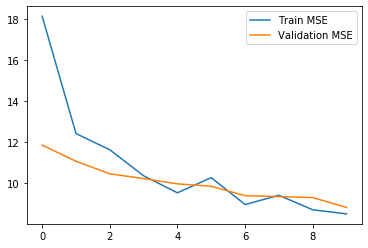

In [15]:
plt.plot(reg_history.history['mse'],
         label="Train MSE")
plt.plot(reg_history.history['val_mse'],
         label="Validation MSE")
#plt.ylim([0, 5.5])
plt.legend()
plt.show()

# FIRE ALL CANNONS!

* More convolutional layers
* More dense units
* ALL the data
* More epochs

In [16]:
def deep_double_regression_model():
    model = Sequential()

    # Convolution Layer
    model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     input_shape=(height, width, channels)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Dense, Classification Layer
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))

    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mse'])
    
    return model

In [21]:
n_subsample = 5000
batch_size = 32

train_gen = datagen.flow_from_dataframe(
    dataframe=labels.head(n_subsample),
    directory="../TRAIN",
    x_col="filename",
    y_col=["z", "theta"],
    subset="training",
    target_size=(height, width),
    batch_size=batch_size,
    seed=314,
    shuffle=False,
    class_mode="other",
)

val_gen = datagen.flow_from_dataframe(
    dataframe=labels.head(n_subsample),
    directory="../TRAIN",
    x_col="filename",
    y_col=["z", "theta"],
    subset="validation",
    target_size=(height, width),
    batch_size=batch_size,
    seed=314,
    shuffle=False,
    class_mode="other",
)

Found 3750 validated image filenames.
Found 1250 validated image filenames.


In [22]:
STEP_SIZE_TRAIN = train_gen.n//train_gen.batch_size
STEP_SIZE_VAL = val_gen.n//val_gen.batch_size

In [23]:
regressor = deep_double_regression_model()
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 34, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 98, 34, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 17, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 15, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 47, 15, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 7, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 5, 64)        

In [24]:
reg_history = regressor.fit_generator(
    generator=train_gen,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=val_gen,
    validation_steps=STEP_SIZE_VAL,
    epochs=15
)

Epoch 1/15
117/117 [==============================] - 9s 78ms/step - loss: 11.8015 - mse: 11.7991 - val_loss: 9.9449 - val_mse: 9.9449
Epoch 2/15
117/117 [==============================] - 8s 67ms/step - loss: 10.3797 - mse: 10.3861 - val_loss: 9.7289 - val_mse: 9.7289
Epoch 3/15
117/117 [==============================] - 8s 67ms/step - loss: 9.5529 - mse: 9.5777 - val_loss: 8.6141 - val_mse: 8.6141
Epoch 4/15
117/117 [==============================] - 8s 70ms/step - loss: 7.9827 - mse: 8.0039 - val_loss: 6.2509 - val_mse: 6.2509
Epoch 5/15
117/117 [==============================] - 8s 69ms/step - loss: 6.3450 - mse: 6.3727 - val_loss: 5.6055 - val_mse: 5.6055
Epoch 6/15
117/117 [==============================] - 8s 69ms/step - loss: 5.6318 - mse: 5.6318 - val_loss: 4.0154 - val_mse: 4.0154
Epoch 7/15
117/117 [==============================] - 8s 68ms/step - loss: 5.2458 - mse: 5.2706 - val_loss: 4.2868 - val_mse: 4.2868
Epoch 8/15
117/117 [==============================] - 8s 69ms/ste

In [ ]:
plt.plot(reg_history.history['mse'],
         label="Train MSE")
plt.plot(reg_history.history['val_mse'],
         label="Validation MSE")
#plt.ylim([0, 5.5])
plt.legend()
plt.show()

## Run against holdout

In [ ]:
holdout_track_params = pd.read_csv('../VALIDATION/track_parms.csv')
holdout_track_params = holdout_track_params.rename(columns={'phi': 'theta'})

In [ ]:
holdout_gen = datagen.flow_from_dataframe(
    dataframe=holdout_track_params,
    directory="../VALIDATION",
    x_col="filename",
    y_col=["z", "phi"],
    subset=None,
    target_size=(height, width),
    batch_size=32,
    seed=314,
    shuffle=False,
    class_mode="raw",
)

In [ ]:
holdout_track_params['z_pred'] = 0.0
holdout_track_params['phi_pred'] = 0.0

In [ ]:
y_pred = deep_double_regression_model.predict(holdout_gen)

## Calculate some metrics and visualize predictions

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
holdout_track_params['z_pred'] = [y[0] for y in y_pred]
holdout_track_params['phi_pred'] = [y[1] for y in y_pred]

In [ ]:
holdout_track_params['delta_z'] = holdout_track_params.eval('z - z_pred')
holdout_track_params['delta_phi'] = holdout_track_params.eval('phi - phi_pred')

In [ ]:
print(r2_score(holdout_track_params['phi'],
               holdout_track_params['phi_pred']))
print(mean_squared_error(holdout_track_params['phi'],
                         holdout_track_params['phi_pred']))

In [ ]:
print(r2_score(holdout_track_params['z'],
               holdout_track_params['z_pred']))
print(mean_squared_error(holdout_track_params['z'],
                         holdout_track_params['z_pred']))

## Visualize

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
holdout_track_params['delta_z'].hist(bins=10, alpha=0.5,
                                     log=False, ax=ax0)
holdout_track_params['delta_z'].hist(bins=10, alpha=0.5,
                                     log=True, ax=ax1)
holdout_track_params['delta_phi'].hist(bins=10, ax=ax2,
                                       alpha=0.5)
ax0.set_title(r'Residual $\Delta z$')
ax1.set_title(r'Residual $\Delta z$ (log)')
ax2.set_title(r'Residual: $\Delta\theta$')
plt.show()

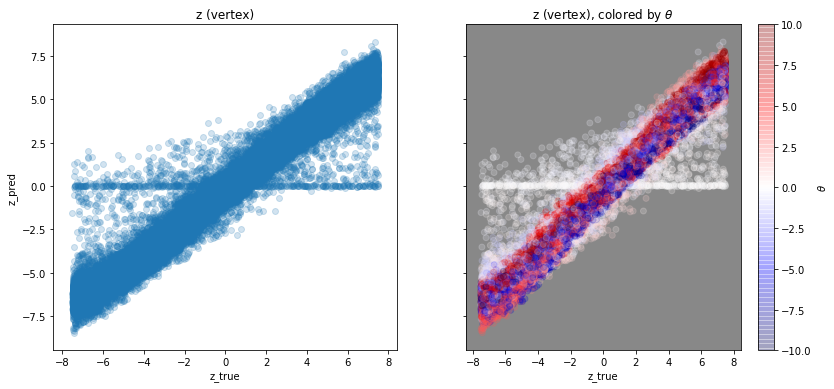

In [354]:
from matplotlib import cm

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,
                               figsize=(12, 6),
                               sharex=True,
                               sharey=True)
scatter = plt.scatter(x=holdout_track_params['z'],
                      y=holdout_track_params['z_pred'],
                      c=holdout_track_params['phi'],
                      cmap=cm.seismic,
                      vmin=-10., vmax=10.,
                      alpha=0.2)
plt.colorbar(scatter, label=r'$\theta$')
ax1.set_facecolor("#888888")
_ = plt.title(r'z (vertex), colored by $\theta$')
_ = plt.xlabel('z_true')

plt.sca(ax0)
scatter = plt.scatter(x=holdout_track_params['z'],
                      y=holdout_track_params['z_pred'],
                      alpha=0.2)
_ = plt.title('z (vertex)')
_ = plt.xlabel('z_true')
_ = plt.ylabel('z_pred')

plt.subplots_adjust(right=1.)

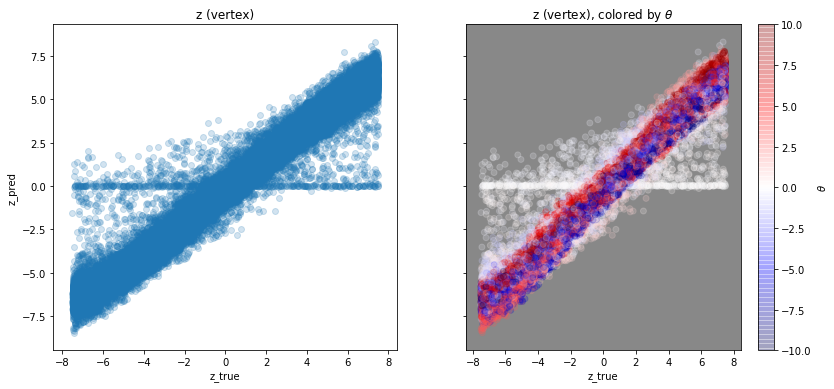

In [354]:
from matplotlib import cm

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,
                               figsize=(12, 6),
                               sharex=True,
                               sharey=True)
scatter = plt.scatter(x=holdout['z'],
                      y=holdout['z_pred'],
                      c=holdout['theta'],
                      cmap=cm.seismic,
                      vmin=-10., vmax=10.,
                      alpha=0.2)
plt.colorbar(scatter, label=r'$\theta$')
ax1.set_facecolor("#888888")
_ = plt.title(r'z (vertex), colored by $\theta$')
_ = plt.xlabel('z_true')

plt.sca(ax0)
scatter = plt.scatter(x=holdout['z'],
                      y=holdout['z_pred'],
                      alpha=0.2)
_ = plt.title('z (vertex)')
_ = plt.xlabel('z_true')
_ = plt.ylabel('z_pred')

plt.subplots_adjust(right=1.)

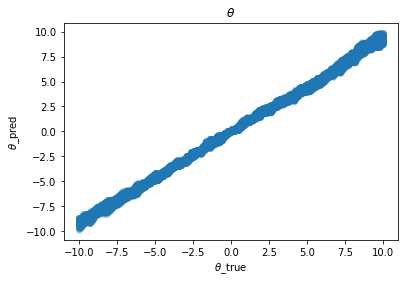

In [281]:
plt.scatter(x=holdout_track_params['phi'], y=holdout_track_params['phi_pred'],
            alpha=0.2)
_ = plt.title(r'$\theta$')
_ = plt.xlabel(r'$\theta$_true')
_ = plt.ylabel(r'$\theta$_pred')